# Лабораторная работа 1. Работа с библиотекой Numpy

Осипенко Д. В., 5.406М

In [2]:
# импортируем необходимые библиотеки и функции
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e в формате svg
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

**Задание 1.** Создайте одномерный вектор `a` целых значений от $l_1$ до $l_2$ включительно. На его основе вычислите следующие вектора и матрицы (размер вектора равен $n = l_2 - l_1 + 1$):

* одномерный вектор длины $n$, состоящий из элементов `a`, расположенных в обратном порядке;
* одномерный вектор длины $n$, состоящий из значений 0 и 1, в котором значение 1 соотвествует элементам, делящимся на 3 в исходном векторе `a`;
* двумерную матрицу-строку размера 1 на $n$, содержащую элементы вектора `a`;
* двумерную матрицу-столбец размера $n$ на 1, содержащую элементы вектора `a`;
* двумерную матрицу размера $n$ на $n$, содержащую все попарные произведения элементов вектора `a`;
* двумерную матрицу размера $n+2$ на $n+2$, основанную на матрице из предыдущего пункта и дополненную "бордюром" из нулей, окружающим ненулевые значения;
* двумерную матрицу размера $n$ на $n$, содержащую элементы вектора `a` на побочной диагонали;
* двумерную матрицу размера $n$ на 3, содержащую повторяющиеся значения из вектора `a` в её столбцах;
* двумерную матрицу размера 5 на $n$, содержащую повторяющиеся значения из вектора `a` в её строках.

Каждый из пунктов должен выводить на экран соответствующее значение.

In [145]:
# ваш код здесь
l1, l2 = 3, 9
n = l2-l1+1
a = np.linspace(l1, l2, n, dtype=int)
print("a: ", a)
print("#1: ", np.flip(a))
print("#2: ", np.array([i % 3 == 0 for i in a], dtype=int))
print("#3: ", a.reshape((1,n)))
print("#4: ", a.reshape((n,1)))
t1 = a.reshape((1,n))*a.reshape((n,1))
print("#5: ", t1)
print("#6: ", np.pad(t1, [(1,1)]))
print("#7: ", np.rot90(np.diag(a)))
print("#8: ", np.tile(a.reshape((n,1)), 3))
print("#9: ", np.tile(a.reshape((1,n)), (5,1)))

a:  [3 4 5 6 7 8 9]
#1:  [9 8 7 6 5 4 3]
#2:  [1 0 0 1 0 0 1]
#3:  [[3 4 5 6 7 8 9]]
#4:  [[3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
#5:  [[ 9 12 15 18 21 24 27]
 [12 16 20 24 28 32 36]
 [15 20 25 30 35 40 45]
 [18 24 30 36 42 48 54]
 [21 28 35 42 49 56 63]
 [24 32 40 48 56 64 72]
 [27 36 45 54 63 72 81]]
#6:  [[ 0  0  0  0  0  0  0  0  0]
 [ 0  9 12 15 18 21 24 27  0]
 [ 0 12 16 20 24 28 32 36  0]
 [ 0 15 20 25 30 35 40 45  0]
 [ 0 18 24 30 36 42 48 54  0]
 [ 0 21 28 35 42 49 56 63  0]
 [ 0 24 32 40 48 56 64 72  0]
 [ 0 27 36 45 54 63 72 81  0]
 [ 0  0  0  0  0  0  0  0  0]]
#7:  [[0 0 0 0 0 0 9]
 [0 0 0 0 0 8 0]
 [0 0 0 0 7 0 0]
 [0 0 0 6 0 0 0]
 [0 0 5 0 0 0 0]
 [0 4 0 0 0 0 0]
 [3 0 0 0 0 0 0]]
#8:  [[3 3 3]
 [4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]
 [8 8 8]
 [9 9 9]]
#9:  [[3 4 5 6 7 8 9]
 [3 4 5 6 7 8 9]
 [3 4 5 6 7 8 9]
 [3 4 5 6 7 8 9]
 [3 4 5 6 7 8 9]]


**Задание 2.** Создайте двумерную матрицу `X` размера $n$ на $m$, содержащую случайные величины, распределенные нормально (по гауссовому распределению) со средним $\mu = 0$ и и среднеквадратичным отклонением $\sigma = 1$. Используйте для этого генератор из модуля `numpy.random`. Сделайте следующее:

* Вычислите двумерную матрицу размера $n$ на $m$, в которой все отрицательные значения заменены на 0;
* Вычислите двумерную матрицу `Y` размера $n$ на $m$, каждый элемент которой вычисляется следующим образом: $y_{ij} = sin(x_{ij}) + cos(x_{ji})$;
* Предложите не менее четырех способов выделения целочисленной части из значений матрицы `X`;
* Вычислите двумерную матрицу размера $n$ на 3, содержащую в первом столбце суммы элементов, во втором столбце средние значения, а в третьем столбце среднеквадратичные отклонения для каждой строки матрицы `X`.

In [154]:
# ваш код здесь
n, m = 4, 5
mu, sigma = 0, 1
X = np.random.default_rng().normal(mu, sigma, size=(n, m)).reshape(n, m)
print("X: ", X)
print("#1: ",np.where(X<0, 0, X))
Y = np.sin(X) + np.cos(X)
print("#2: ", Y)
print("#3.1: ", X.astype(np.int32))
print("#3.2: ", np.trunc(X))
print("#3.3: ", np.fix(X))
print("#3.4: ", np.array(X, dtype=int))
print("#4: ", np.hstack((
    np.sum(X, 1),
    np.average(X, 1),
    np.std(X, 1)
)).reshape((n,3)))

X:  [[ 0.66779811 -0.47146088 -0.65148683  0.14290763  0.42719419]
 [-0.40028397  0.59701552  2.01034743 -1.27186651  1.6459929 ]
 [-0.61667144 -0.15765406  1.49439806 -0.11667478  0.00572212]
 [-0.35616139  0.9894785  -0.15689343 -0.64078525  0.60342392]]
#1:  [[0.66779811 0.         0.         0.14290763 0.42719419]
 [0.         0.59701552 2.01034743 0.         1.6459929 ]
 [0.         0.         1.49439806 0.         0.00572212]
 [0.         0.9894785  0.         0.         0.60342392]]
#2:  [[ 1.4044457   0.43671746  0.18881373  1.13222777  1.32445061]
 [ 0.5312705   1.38919386  0.4794095  -0.66115456  0.92204834]
 [ 0.23748505  0.83059652  1.07340704  0.87679097  1.00570572]
 [ 0.58856307  1.3848655   0.8314669   0.20380147  1.39086253]]
#3.1:  [[ 0  0  0  0  0]
 [ 0  0  2 -1  1]
 [ 0  0  1  0  0]
 [ 0  0  0  0  0]]
#3.2:  [[ 0. -0. -0.  0.  0.]
 [-0.  0.  2. -1.  1.]
 [-0. -0.  1. -0.  0.]
 [-0.  0. -0. -0.  0.]]
#3.3:  [[ 0. -0. -0.  0.  0.]
 [-0.  0.  2. -1.  1.]
 [-0. -0.  1. 

**Задание 3.** Постройте вектор размера $n$ элементов, заполненный случайными нормально распределенными числами, распределенными со средним равным $\mu$ и среднеквадратичным отклонением $\sigma$. Постройте гистограмму эмпирического распределения при помощи функции `matplotlib.pyplot.hist`. Приведите аргументы, касающиеся выбора оптимального числа карманов (`bins`) при построении гистограммы.

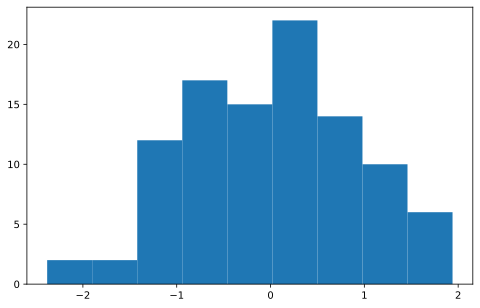

In [168]:
# ваш код здесь
n = 100
mu, sigma = 0, 1
X = np.random.default_rng().normal(mu, sigma, size=n)
plt.hist(X, bins='auto')
plt.show()

**Задание 4.** Вычислите так называемую случайную матрицу Вигнера $W$ размера $n \times n$. Для этого вычислите случайную матрицу $X$ из нормально распределенных чисел (размера $n$ на $n$, $\mu=0$, $\sigma=1$). Матрица $W$ определяется формулой: $$ \frac {(X + X^T)}{\sqrt{2n}}.$$ Вычислите среднее значение и среднеквадратичное отклонение элементов полученной матрицы $W$. 

In [172]:
# ваш код здесь
n = 4
mu, sigma = 0, 1
X = np.random.default_rng().normal(mu, sigma, size=n**2).reshape((n,n))
W = (X + X.T)/(np.sqrt(2*n))
print("W: ", W)
print(f"Avg: {np.average(W)}, STD: {np.std(W)}")

W:  [[ 0.7715821  -0.20864812 -0.52124173  0.51238204]
 [-0.20864812 -1.17805574 -0.72796616  0.04417725]
 [-0.52124173 -0.72796616 -0.11268269 -0.09960462]
 [ 0.51238204  0.04417725 -0.09960462  1.20649366]]
Avg: -0.08215408402540464, STD: 0.5906897147418082


**Задание 5.** Повторите 1000 раз следующий эксперимент: сгенерируйте две матрицы размера $n \times n$ из стандартного нормального распределения, перемножьте их (обычным матричным умножением) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 25- и 75-процентные квантили? Постройте в виде гистограммы распределение максимальных элементов. Для вычисления квантили воспользуйтесь функцией `np.percentile`

Avg -> 1.9367190111562835
25% -> 1.1970429766806205
75% -> 2.3830873929776857


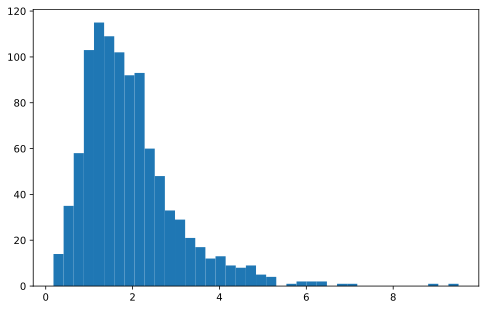

In [185]:
# ваш код здесь
n = 4
mu, sigma = 0, 1
vals = []
for _ in range(1000):
    X1 = np.random.default_rng().normal(mu, sigma, size=n**2).reshape((n,n))
    X2 = np.random.default_rng().normal(mu, sigma, size=n**2).reshape((n,n))
    vals.append(np.max(X1*X2))
print(f"Avg -> {np.average(vals)}")
print(f"25% -> {np.percentile(vals, 25)}")
print(f"75% -> {np.percentile(vals, 75)}")
plt.hist(vals, bins='auto')
plt.show()


**Задание 6.** Сгенерируйте $n$ чисел из распределения Пуассона с параметром $\lambda$. Сформируйте массив, в котором в i-м элементе будет записано количество сгенерированных чисел, равных i. Постройте гистограмму эмпирического распределения. Реализуйте функцию, которая принимает на вход numpy-массив целых чисел a (подобный полученному), и генерирует массив, в котором число i встречается a[i] раз.

**Подсказка:** обратите внимание на функции `np.bincount` и `np.repeat`

In [ ]:
# ваш код здесь

**Задание 7.** Напишите функцию `scale(X)`, которая принимает на вход двумерную матрицу произвольного размера и масштабирует каждый ее столбец (вычитает среднее и делит полученные значения на стандартное отклонение, вычисленные для всех элементов данного столбца). Учтите случай деления на нулевое значение (добавьте к стандартному отклонению малую константу порядка $10^{-6}$). Загрузите и перемасштабируйте таблицу с векторами признаков из встроенного набора `"Wine recognition dataset"` [https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset ]

In [ ]:
# ваш код здесь

**Задание 8.** Постройте в виде набора `scatter`-графиков различные пары признаков из отнормированных данных предыдущего задания. Обратите внимание, что набор данных `"Wine recognition dataset"` представляет собой словарь. Найдите в нём названия признаков объектов и разметку объектов по меткам классов и используйте их для оформления графиков. Какие из полученных графиков по вашему мнению наиболее информативны? Почему?

In [ ]:
# ваш код здесь

**Задание 9.** Реализуйте функцию, вычисляющую коэффициенты линейной регрессии $a_1$ и $a_0$ для зависимости вида $y_i(x)=a_1 x_i + a_0$. Для этого обратитесь к материалу второй лекции курса, где был разобран подобный пример. На вход функция должна принимать два вектора $x$ и $y$. Результат работы должен представлять два значения коэффициентов $a_1$ и $a_0$.

In [ ]:
# ваш код здесь

**Задание 10.** Примените функцию из предыдущего пункта для предсказания того, как прогрессирует диабет у пациентов из набора данных `"Diabetes dataset"`[https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset ] Для этого загрузите этот набор. В качестве $x$ используйте значения признака индекса массы тела (`bmi`), в качестве $y$ - значения по ключу `target`. Вычислите коэффициенты $a_1$ и $a_0$. Постройте график с осью абсцисс, отвечающей за значения `bmi`, осью ординат со значениями `target`. В виде 442 точек нанесите примеры из загруженных данных, в виде прямой представьте предсказания модели. Подпишите оси координат и метки значений на осях

In [ ]:
# ваш код здесь